<a href="https://colab.research.google.com/github/sai-123-code/Machine-learning/blob/main/courseralinearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_examples(num=1000):
  w=[1.0,-3.0]
  b=1.0
  w = np.reshape(w,(2,1))
  x = np.random.randn(num,2)
  y = b + np.dot(x,w)+np.random.randn()
  y = np.reshape(y,(num,1))
  return x,y
x,y = generate_examples()
print(x.shape,y.shape)

(1000, 2) (1000, 1)


In [ ]:
class Model:
  def __init__(self, num_features):
    self.num_features = num_features
    self.w=np.random.randn(num_features,1)
    self.b=np.random.randn()


In [ ]:
model= Model(2)
print(model.w)
print(model.b)

[[-0.38083179]
 [ 0.91433719]]
0.015673631592857788


In [ ]:
class Model(Model):
  def forward_pass(self,x):
    y_hat=self.b+np.dot(x,self.w)
    return y_hat
y_hat=Model(2).forward_pass(x)
print(y_hat.shape)

(1000, 1)


In [ ]:
class Model(Model):
  def compute_loss(self,y_hat,y_true):
    return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
model=Model(2) 
y_hat= model.forward_pass(x)
loss= model.compute_loss(y_hat,y)
loss

12.993313572695408

In [ ]:
class Model(Model):
  def backward_pass(self,x,y_true,y_hat):
    m=y_true.shape[0]
    db=(1/m)*np.sum(y_hat-y_true)
    dw=(1/m)*np.sum(np.dot(np.transpose(y_hat - y_true),x),axis=0)
    return dw,db

In [ ]:
model = Model(2)
x,y=generate_examples()
y_hat=model.forward_pass(x)
dw,db =model.backward_pass(x,y,y_hat)
print(dw,db)

[-2.36997113  2.33036036] 0.5253225676730756


In [ ]:
class Model(Model):
  def update_params(self,dw,db,lr):
    self.w = self.w-lr*np.reshape(dw,(self.num_features,1))
    self.b = self.b- db
  

In [ ]:
class Model(Model):
  def train(self,x_train,y_train,iterations,lr):
    losses=[]
    for i in range(0,iterations):
      y_hat=self.forward_pass(x_train)
      loss=self.compute_loss(y_hat,y_train)
      dw,db=self.backward_pass(x_train,y_train,y_hat)
      self.update_params(dw,db,lr)
      losses.append(loss)
      if i%int(iterations/10)==0:
        print('iter:{},loss:{:.4f}'.format(i,loss))
    return losses

In [ ]:
model=Model(2)
x_train,y_train=generate_examples()
losses= model.train(x_train,y_train,1000,3e-3)

iter:0,loss:3.0905
iter:100,loss:1.6721
iter:200,loss:0.9089
iter:300,loss:0.4941
iter:400,loss:0.2686
iter:500,loss:0.1460
iter:600,loss:0.0794
iter:700,loss:0.0432
iter:800,loss:0.0235
iter:900,loss:0.0128


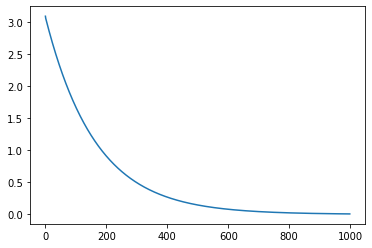

In [ ]:
plt.plot(losses)

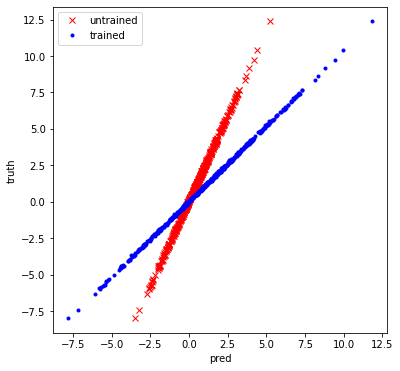

In [ ]:
model_untrained=Model(2)
x_test,y_test=generate_examples(500)
pred_untrained=model_untrained.forward_pass(x_test)
pred_trained=model.forward_pass(x_test)
plt.figure(figsize=(6,6))
plt.plot(pred_untrained,y_test,'rx',label='untrained')
plt.plot(pred_trained,y_test,'b.',label='trained')
plt.legend()
plt.xlabel('pred')
plt.ylabel('truth')
plt.show()
      